<a href="https://colab.research.google.com/github/woosuvin/machine_learning/blob/main/ml06_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# Wine 데이터셋
white, red 와인 분류

In [53]:
# csv 파일 github url
wine_csv = 'https://raw.githubusercontent.com/JakeOh/20230228_itwill_java140_lab_python/main/wine.csv'

In [54]:
wine = pd.read_csv(wine_csv)

In [55]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [56]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [57]:
wine['class'].unique()
# > class 컬럼 - 카테고리 변수

array([0., 1.])

In [58]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

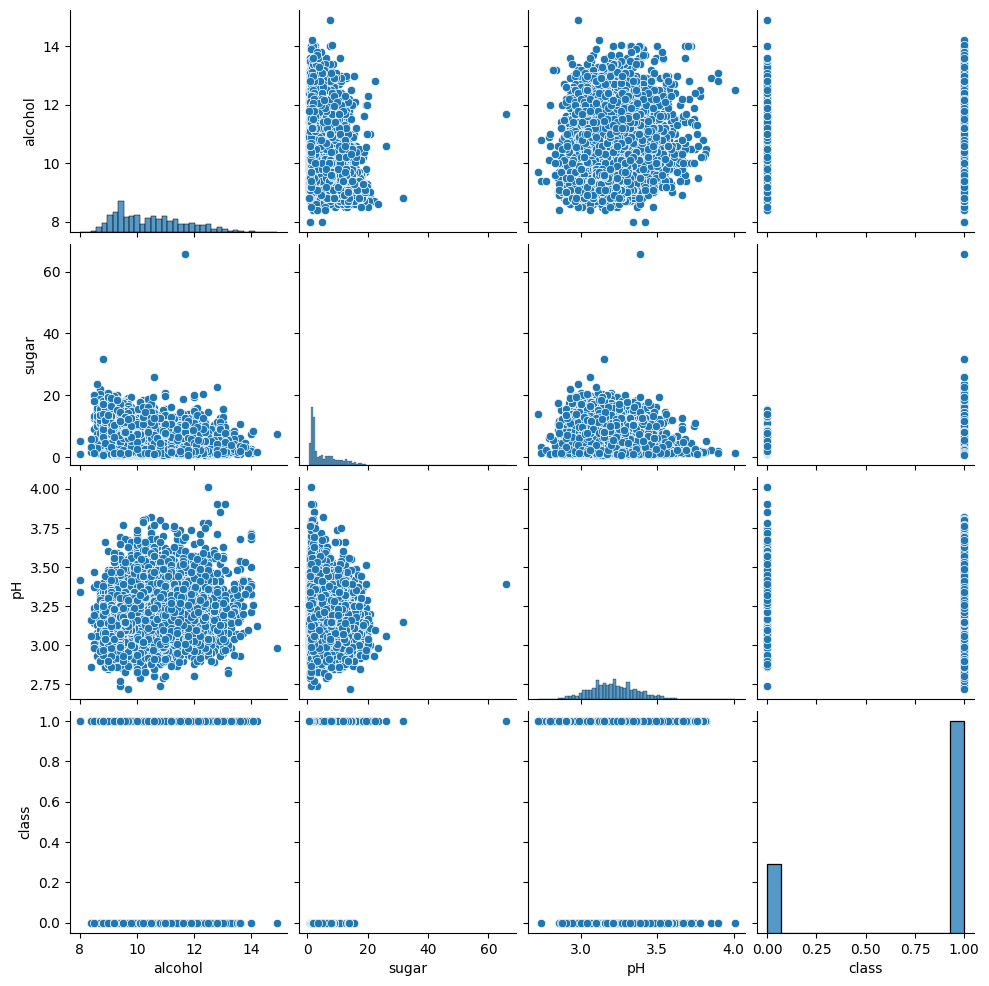

In [59]:
sns.pairplot(data=wine)
plt.show()

## 데이터프레임을 특성 배열, 타겟 배열로 분리

In [60]:
X = wine.iloc[:, :-1].values # 특성(2차원) 배열
y = wine['class'].values # 타겟(1차원) 배열

In [61]:
X.shape # 특성 배열의 shape = (n_samles, n_features)

(6497, 3)

In [62]:
y.shape # 타겟 배열의 shape = (n_sample,)

(6497,)

In [63]:
feature_names = ['alcohol', 'sugar', 'ph'] # 특성의 이름들을 리스트로 만듦
target_names = ['red', 'white'] # 타겟의 이름들(0: red, 1:white)

# 훈련 검증, 테스트 셋 분리

In [64]:
# 훈련 셋, 테스트 셋 분리
X_tr_total, X_te, y_tr_total, y_te = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify=y) # 층화추출

In [65]:
X_tr_total.shape, X_te.shape, y_tr_total.shape, y_te.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [66]:
np.unique(y_tr_total, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [67]:
np.unique(y_te, return_counts=True)

(array([0., 1.]), array([320, 980]))

In [68]:
# 훈련 셋을 다시 훈련 셋과 검증 셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_total, y_tr_total,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_total)

In [69]:
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((4157, 3), (1040, 3), (4157,), (1040,))

# Decision Tree(의사결정 나무) 분류

## 모델 생성

In [70]:
tree_clf = DecisionTreeClassifier()

## 모델 훈련(데이터 학습)

In [71]:
tree_clf.fit(X_tr, y_tr)

DecisionTreeClassifier()

## 훈련 셋 예측 평가

In [72]:
y_tr_pred = tree_clf.predict(X_tr)

In [73]:
accuracy_score(y_tr, y_tr_pred)

0.9980755352417608

In [74]:
confusion_matrix(y_tr, y_tr_pred)

array([[1022,    1],
       [   7, 3127]])

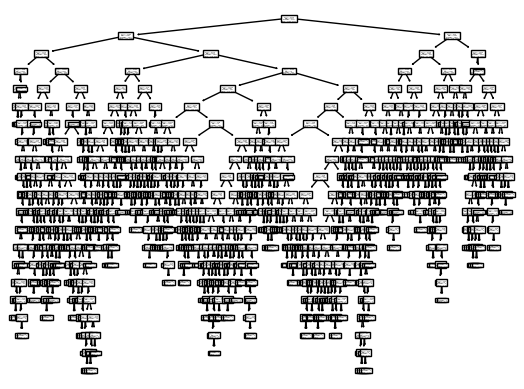

In [75]:
plot_tree(tree_clf)
plt.show()

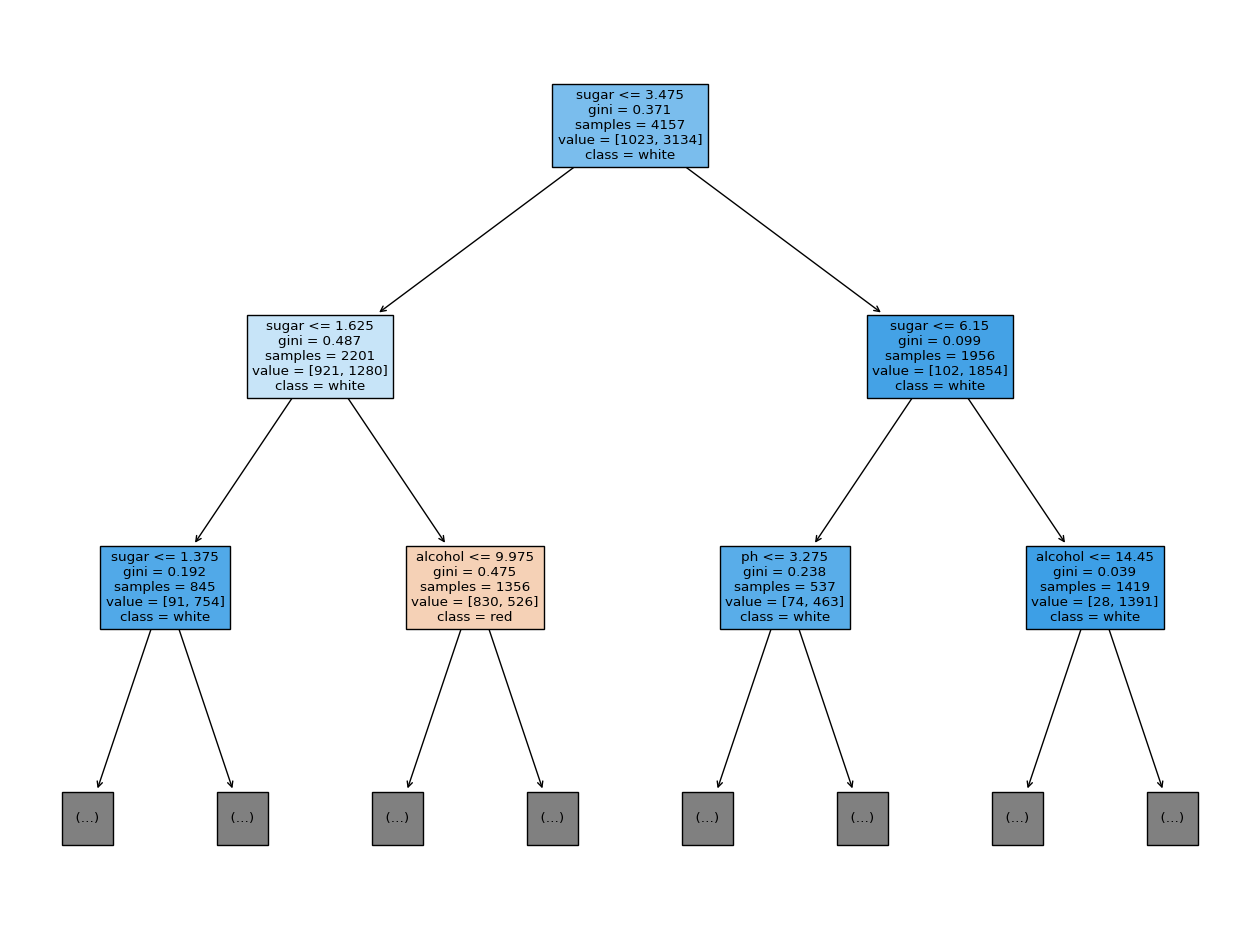

In [76]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2,
          feature_names=feature_names,
          class_names=target_names,
          filled=True)
plt.show()

* Decision Tree의 장점:
  * 특성들의 스케일을 변환할 필요가 없음.
  * 결과를 이해하기 쉬움.
* Decision Tree의 단점:
  * 과대적합(overfitting) 되기 쉬움.
    * 규제를 적용하거나 하이퍼 파라미터 튜닝을 통해서 과대적합을 해결해야 함.

## 검증 셋 예측 결과 평가

In [77]:
y_val_pred = tree_clf.predict(X_val)

In [78]:
accuracy_score(y_val, y_val_pred)

0.8759615384615385

In [79]:
confusion_matrix(y_val, y_val_pred)

array([[197,  59],
       [ 70, 714]])

# 하이퍼 파라미터 튜닝

* DecisionTreeClassifier 생성자의 파라미터 max_depth를 1~20까지 바꿔가면서
  * DecisionTree 모델 생성, 훈련
  * 훈련 셋 정확도 저장
  * 검증 셋 정확도 저장
* max_depth에 다른 훈련/검증 셋의 정확도 그래프 시각화

In [80]:
depths = np.arange(1, 21)
train_scores = [] # 훈련 셋 정확도들을 저장할 리스트
val_scores = [] # 검증 셋 정확도들을 저장할 리스트

for d in depths:
  tree_clf = DecisionTreeClassifier(max_depth=d) # 모델 생성
  tree_clf.fit(X_tr, y_tr) # 모델 훈련

  train_acc = tree_clf.score(X_tr, y_tr) # 훈련 셋 정확도
  train_scores.append(train_acc)

  val_acc = tree_clf.score(X_val, y_val) # 검증 셋 정확도
  val_scores.append(val_acc)

In [81]:
print(train_scores)

[0.7539090690401732, 0.8270387298532595, 0.8272792879480394, 0.8636035602598028, 0.8691363964397402, 0.8775559297570363, 0.8888621602116912, 0.8987250420976666, 0.9129179696896801, 0.9302381525138321, 0.9453933124849652, 0.9581428915082992, 0.9699302381525138, 0.9800336781332691, 0.9860476305027664, 0.991339908587924, 0.9944671638200625, 0.9961510704835218, 0.9971133028626413, 0.9980755352417608]


In [82]:
print(val_scores)

[0.7538461538461538, 0.8298076923076924, 0.8298076923076924, 0.864423076923077, 0.875, 0.8682692307692308, 0.8615384615384616, 0.8634615384615385, 0.8586538461538461, 0.8615384615384616, 0.8625, 0.8682692307692308, 0.8721153846153846, 0.8740384615384615, 0.8653846153846154, 0.8740384615384615, 0.8740384615384615, 0.8692307692307693, 0.8740384615384615, 0.8711538461538462]


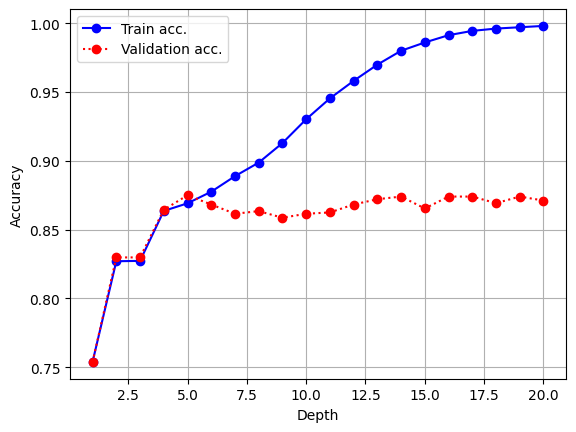

In [83]:
plt.plot(depths, train_scores, 'bo-', label='Train acc.')
plt.plot(depths, val_scores, 'ro:', label='Validation acc.')

plt.grid()
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

> 위 결과를 보면 의사결정 나무의 max_depth를 6보다 크게 하는 것은 검증 셋의 정확도를 높이지 못하고 과대적합(overfitting)만 더 커지는 결과를 줌.  
max_depth의 값이 6보다 크면 일반화 성능이 떨어짐.

# 교차 검증(Cross Validation)

In [86]:
# 전체 데이터를 훈련/테스트 셋으로 나누고, 훈련 셋(X_tr_total, y_tr_total)을 사용해서 교차 검증
# 교차 검증에서 사용할 머신 러닝 모델 생성
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [91]:
cv = cross_validate(estimator=tree_clf, # 머신 러닝 모델
                    X=X_tr_total, y=y_tr_total, # X=특성 배열, y=타겟 배열
                    cv=5, # 교차 검증 fold 개수
                    n_jobs=-1, # 병렬 작업 수
                    return_train_score=True) # 훈련 셋 점수 리턴 여부
# 평가 점수(Score)
# (1) 분류: 정확도(accuracy)
# (2) 회귀: 결정 계수(R2 score)

In [92]:
cv
# > dict
# fit_time: 훈련 시간
# score_time: 평가 시간
# test_score: 검증 셋 점수(정확도)
# train_score: 훈련 셋 점수(정확도)

{'fit_time': array([0.00858665, 0.0185442 , 0.00964952, 0.00773001, 0.0166471 ]),
 'score_time': array([0.00572228, 0.00168729, 0.00225878, 0.00144172, 0.00115538]),
 'test_score': array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273]),
 'train_score': array([0.87466923, 0.8811643 , 0.88455988, 0.88095238, 0.88648389])}

In [95]:
# 검증 셋 점수들의 평균 -> 한번도 학습되지 않은 테스트 셋의 점수와 비슷하거나 조금 높을 수 있음.
np.mean(cv['test_score'])

0.8620333900940252

In [98]:
tree_clf.fit(X_tr_total, y_tr_total) # 전체 훈련 셋을 학습
tree_clf.score(X_te, y_te) # 한번도 학습되지 않은 테스트 셋에서 점수 계산

0.8484615384615385

# Grid Search 교차 검증
교차 검증을 사용한 하이퍼 파라미터 튜닝 방법

Decision Tree 알고리즘의 하이퍼 파라미터:
* max_depth: 나무의 최대 깊이.
* max_leaf_node: leaf node(terminal node, 터미널 노드)의 최대 개수.
* max_features: 각 노드에서 분할에 사용할 특성의 최대 개수.
* min_samples_split: 분할되기 위해서 노드가 가져야하는 샘플의 최소 개수(또는 비율).
* min_samples_leaf: leaf node가 가지고 있어야 할 최소 샘플 개수(또는 비율).
---
* `max_`로 시작하는 파라미터들은 값을 증가시키면 나무의 크기가 더 커짐. 과대적합이 더 커짐. `max_`로 시작하는 값을 감소시키면 나무의 크기가 작아지고 과대적합이 줄어듦.
* `min_`으로 시작하는 파라미터들은 값을 증가시키면 나무의 크기가 작아지고, 과대적합이 줄어듦. `min_`으로 시작하는 파라미터 값을 감소시키면 나무 크기가 커기조 과대적합이 커짐.

In [100]:
# Grid Search 교차 검증에서 사용할 머신 러닝 모델 생성
tree_clf = DecisionTreeClassifier(random_state=42)

In [101]:
# Grid Search 교차 검증에서 사용할 파라미터 조합: 20 X 6 = 120 조합
params = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
}

In [104]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(estimator=tree_clf, # 교차 검증 머신 러닝 모델
                       param_grid=params, # 교차 검증 하이퍼 파라미터 조합
                       n_jobs=-1, # 병렬 작업 수
                       cv=5) # 교차 검증 fold

In [105]:
# Grid Search 교차 검증 실행: 훈련 데이터 학습
grid_cv.fit(X_tr_total, y_tr_total)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': [0.001, 0.005, 0.01, 0.05, 0.1,
                                               0.2]})

In [106]:
# Grid Search 교차 검증의 결과: (1) best param 최적의 파라미터 조합, (2) best model 최적의 모델
grid_cv.best_params_

{'max_depth': 11, 'min_samples_split': 0.01}

In [107]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_split=0.01, random_state=42)

In [109]:
grid_cv.best_score_ # 5-fold 검증 셋들에서 정확도 평균
# > 한번도 훈련되지 않은 테스트 셋의 점수와 비슷하거나 약간 높음.

0.8666522914044569

In [110]:
# 최적의 파라미터 조합을 갖는 모델의 테스트 점수
best_model = grid_cv.best_estimator_
best_model.score(X_te, y_te)

0.8538461538461538